In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from collections import Counter
import ast

In [2]:
movies = pd.read_csv('./movies_dataset.csv')
movies_credits = pd.read_csv('./credits.csv')

In [3]:
#Verificamos valores nulos
null_values = movies.isnull().sum()
null_values_percentage = (movies.isnull().sum() / len(movies)) * 100

In [9]:
#Aplicamos lo mismo al dataset de credits
null_values_credits = movies_credits.isnull().sum()
null_values_percentage_credits = (movies_credits.isnull().sum() / len(movies_credits)) * 100

In [4]:
print(null_values)
print(null_values_percentage)

belongs_to_collection             0
budget                            0
genres                            0
id                                0
original_language                11
overview                        941
popularity                        0
production_companies              0
production_countries              0
release_date                      0
revenue                           0
runtime                         246
spoken_languages                  0
status                           80
tagline                       24978
title                             0
vote_average                      0
vote_count                        0
collection_id                 42211
collection_name               42211
collection_poster_path        42211
production_companies_names    12280
production_countries_names     6216
release_year                      0
return                            0
collection_id.1               42211
collection_name.1             42211
collection_poster_path.1    

In [10]:
print(null_values_credits)
print(null_values_percentage_credits)

cast                       0
crew                       0
id                         0
cast_id                   40
character                596
credit_id                 40
gender                    40
id_cast                   40
name                      40
order                     40
profile_path           13019
credit_id_crew            19
department                19
gender_crew               19
id_crew                   19
job                       19
name_crew                 19
profile_path_crew      34833
cast_id_cast              40
character_cast           596
credit_id_cast            40
gender_cast               40
id_cast.1                 40
name_cast                 40
order_cast                40
profile_path_cast      13019
credit_id_crew.1          19
department_crew           19
gender_crew.1             19
id_crew.1                 19
job_crew                  19
name_crew.1               19
profile_path_crew.1    34833
dtype: int64
cast                    0.0000

Para tratar los valores faltantes, podríamos simplemente eliminarlos, o rellenarlos con un valor específico. 
Por ejemplo: 
movies_clean = movies.dropna()
movies_clean = movies.fillna(value={'columna': valor})

In [5]:
# Verificamos valores duplicados
duplicate_values = movies.duplicated().sum()

In [11]:
duplicate_values_credits = movies_credits.duplicated().sum()

In [12]:
print(f'Cantidad de valores duplicados en el dataset movies: {duplicate_values}')
print(f'Cantidad de valores duplicados en el dataset credits: {duplicate_values_credits}')

Cantidad de valores duplicados en el dataset movies: 17
Cantidad de valores duplicados en el dataset credits: 0


In [7]:
#Verificamos los tipos de datos:
data_types = movies.dtypes

In [8]:
print(data_types)

belongs_to_collection          object
budget                        float64
genres                         object
id                              int64
original_language              object
overview                       object
popularity                    float64
production_companies           object
production_countries           object
release_date                   object
revenue                       float64
runtime                       float64
spoken_languages               object
status                         object
tagline                        object
title                          object
vote_average                  float64
vote_count                    float64
collection_id                 float64
collection_name                object
collection_poster_path         object
production_companies_names     object
production_countries_names     object
release_year                    int64
return                        float64
collection_id.1               float64
collection_n

In [13]:
data_types_credits = movies_credits.dtypes

In [14]:
print(data_types_credits)

cast                    object
crew                    object
id                       int64
cast_id                float64
character               object
credit_id               object
gender                 float64
id_cast                float64
name                    object
order                  float64
profile_path            object
credit_id_crew          object
department              object
gender_crew            float64
id_crew                float64
job                     object
name_crew               object
profile_path_crew       object
cast_id_cast           float64
character_cast          object
credit_id_cast          object
gender_cast            float64
id_cast.1              float64
name_cast               object
order_cast             float64
profile_path_cast       object
credit_id_crew.1        object
department_crew         object
gender_crew.1          float64
id_crew.1              float64
job_crew                object
name_crew.1             object
profile_

In [15]:
#Resúmen estadístico:
summary = movies.describe()

In [16]:
summary_credits = movies.describe()

In [18]:
print(summary)

             budget             id    popularity       revenue       runtime  \
count  4.537600e+04   45376.000000  45376.000000  4.537600e+04  45130.000000   
mean   4.232604e+06  108027.103094      2.926458  1.123010e+07     94.181675   
std    1.743986e+07  112168.377996      6.009672  6.438996e+07     38.341059   
min    0.000000e+00       2.000000      0.000000  0.000000e+00      0.000000   
25%    0.000000e+00   26385.750000      0.388840  0.000000e+00     85.000000   
50%    0.000000e+00   59857.500000      1.130454  0.000000e+00     95.000000   
75%    0.000000e+00  156533.500000      3.691695  0.000000e+00    107.000000   
max    3.800000e+08  469172.000000    547.488298  2.787965e+09   1256.000000   

       vote_average    vote_count  collection_id  release_year        return  \
count  45376.000000  45376.000000    3165.000000  45376.000000  4.537600e+04   
mean       5.624070    110.096439  158821.743444   1991.881193  6.600428e+02   
std        1.915423    491.742894  1363

In [19]:
print(summary_credits)

             budget             id    popularity       revenue       runtime  \
count  4.537600e+04   45376.000000  45376.000000  4.537600e+04  45130.000000   
mean   4.232604e+06  108027.103094      2.926458  1.123010e+07     94.181675   
std    1.743986e+07  112168.377996      6.009672  6.438996e+07     38.341059   
min    0.000000e+00       2.000000      0.000000  0.000000e+00      0.000000   
25%    0.000000e+00   26385.750000      0.388840  0.000000e+00     85.000000   
50%    0.000000e+00   59857.500000      1.130454  0.000000e+00     95.000000   
75%    0.000000e+00  156533.500000      3.691695  0.000000e+00    107.000000   
max    3.800000e+08  469172.000000    547.488298  2.787965e+09   1256.000000   

       vote_average    vote_count  collection_id  release_year        return  \
count  45376.000000  45376.000000    3165.000000  45376.000000  4.537600e+04   
mean       5.624070    110.096439  158821.743444   1991.881193  6.600428e+02   
std        1.915423    491.742894  1363

In [25]:
#Realizamos matriz de correlación
#Primero seleccionamos solo las columnas numéricas
numeric = movies.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric.corr()

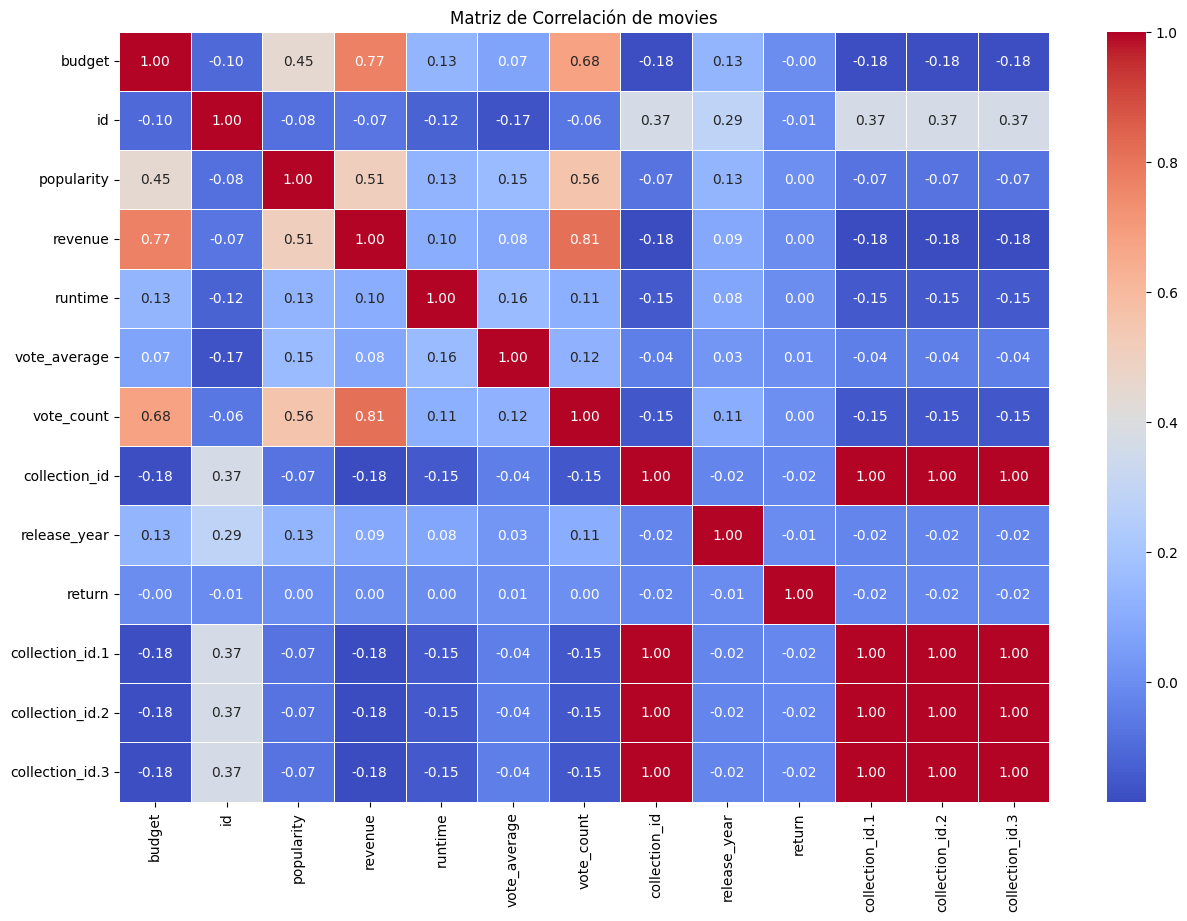

In [28]:
#Ahora graficamos
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de movies')
plt.show()

In [27]:
numeric_credits = movies_credits.select_dtypes(include=['float64', 'int64'])
correlation_matrix_credits = numeric_credits.corr()

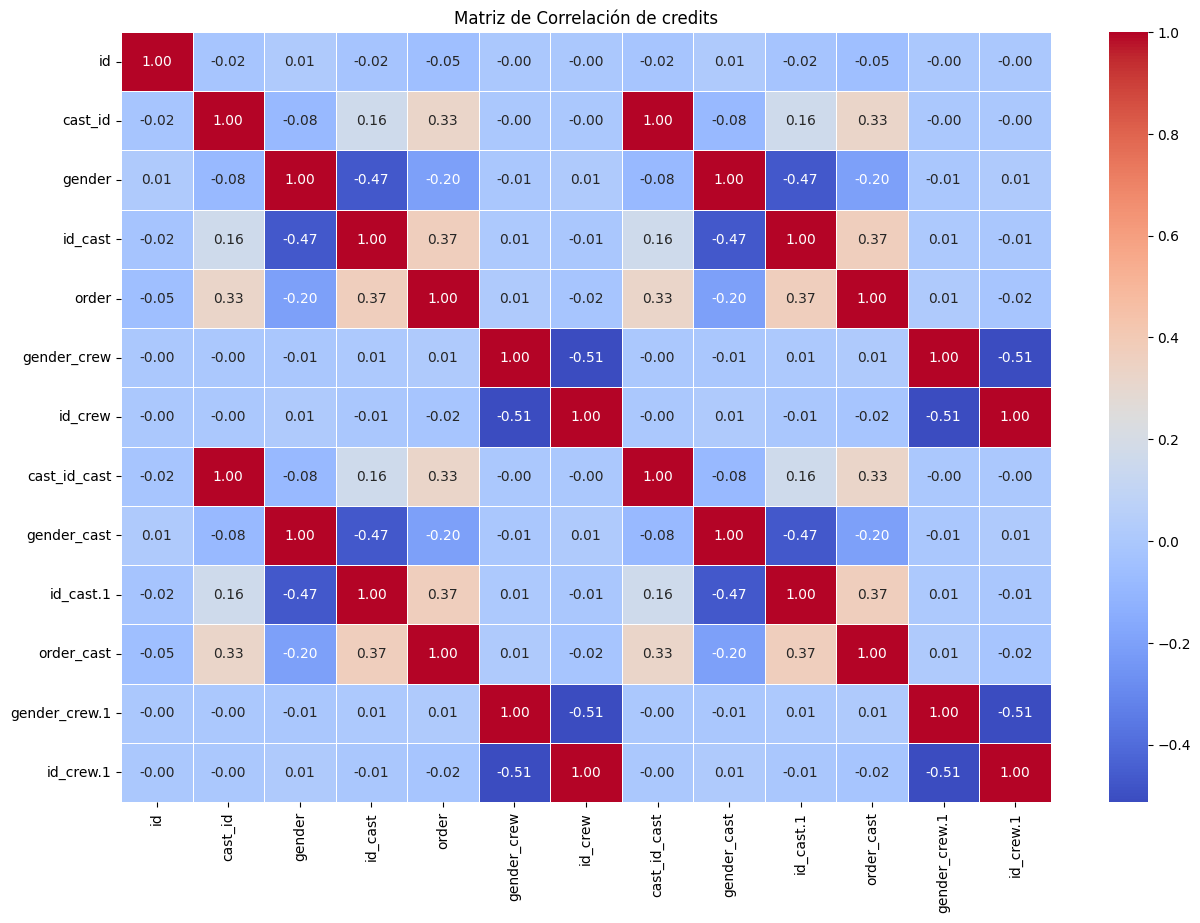

In [29]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_credits, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de credits')
plt.show()

In [30]:
#Budget promedio del dataset movies:
budget_movies = movies['budget'].mean()

In [31]:
print(f"El promedio del presupuesto es: {budget_movies}")

El promedio del presupuesto es: 4232604.385071403


Text(0, 0.5, 'Frecuencia')

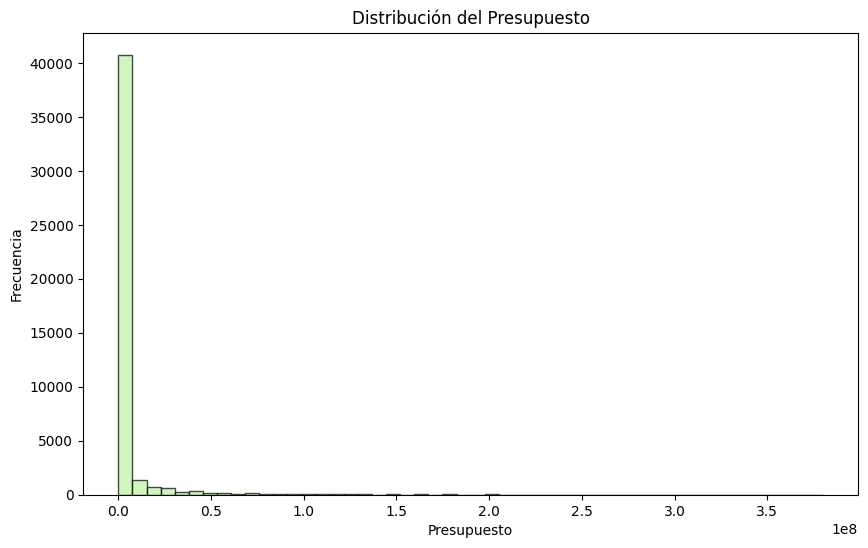

In [68]:
#Graficamos con histograma
plt.figure(figsize=(10, 6))
plt.hist(movies['budget'], bins=50, edgecolor='k', alpha=0.7, color='#bcf2a5')
plt.title('Distribución del Presupuesto')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')

In [49]:
#Item con mayor popularidad de la columna popularity:
most_popular_item = movies.loc[movies['popularity'].idxmax()]

In [50]:
print(f"El ítem con mayor popularidad es:\n{most_popular_item}")

El ítem con mayor popularidad es:
belongs_to_collection         {'id': 86066, 'name': 'Despicable Me Collectio...
budget                                                               74000000.0
genres                                                                       {}
id                                                                       211672
original_language                                                            en
overview                      Minions Stuart, Kevin and Bob are recruited by...
popularity                                                           547.488298
production_companies          [{'name': 'Universal Pictures', 'id': 33}, {'n...
production_countries          [{'iso_3166_1': 'US', 'name': 'United States o...
release_date                                                         2015-06-17
revenue                                                            1156730962.0
runtime                                                                    91.0
spoken

Esto nos muestra que la más popular, es la colección de Despicable Me.

In [51]:
popularity_mean = movies['popularity'].mean()

In [52]:
print(f"El promedio de la popularidad es: {popularity_mean}")

El promedio de la popularidad es: 2.926457567502645


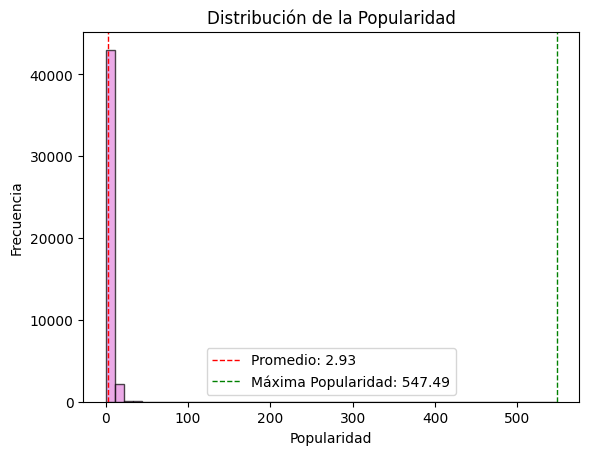

In [67]:
#Graficamos con histograma
plt.hist(movies['popularity'], bins=50, edgecolor='k', alpha=0.7, color='#e386dd')
plt.axvline(popularity_mean, color='r', linestyle='dashed', linewidth=1, label=f'Promedio: {popularity_mean:.2f}')
plt.axvline(most_popular_item['popularity'], color='g', linestyle='dashed', linewidth=1, label=f'Máxima Popularidad: {most_popular_item["popularity"]:.2f}')
plt.title('Distribución de la Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [54]:
print(movies['production_companies'].head(10))

0       [{'name': 'Pixar Animation Studios', 'id': 3}]
1    [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2    [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3    [{'name': 'Twentieth Century Fox Film Corporat...
4    [{'name': 'Sandollar Productions', 'id': 5842}...
5    [{'name': 'Regency Enterprises', 'id': 508}, {...
6    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
7          [{'name': 'Walt Disney Pictures', 'id': 2}]
8    [{'name': 'Universal Pictures', 'id': 33}, {'n...
9    [{'name': 'United Artists', 'id': 60}, {'name'...
Name: production_companies, dtype: object


In [55]:
company_counter = Counter()

In [56]:
for companies in movies['production_companies'].dropna(): #Iteramos sobre cada fila
    companies_list = ast.literal_eval(companies) #Convertimos la cadena de compañías a una lista de diccionarios
    for company in companies_list:
        company_counter[company['name']] += 1

In [57]:
#Top 3 companías de producción:
top_3_companies = company_counter.most_common(3)
print("Las 3 compañías de producción más comunes son:", top_3_companies)

Las 3 compañías de producción más comunes son: [('Warner Bros.', 1243), ('Metro-Goldwyn-Mayer (MGM)', 1045), ('Paramount Pictures', 1000)]


In [58]:
companies, counts = zip(*top_3_companies)

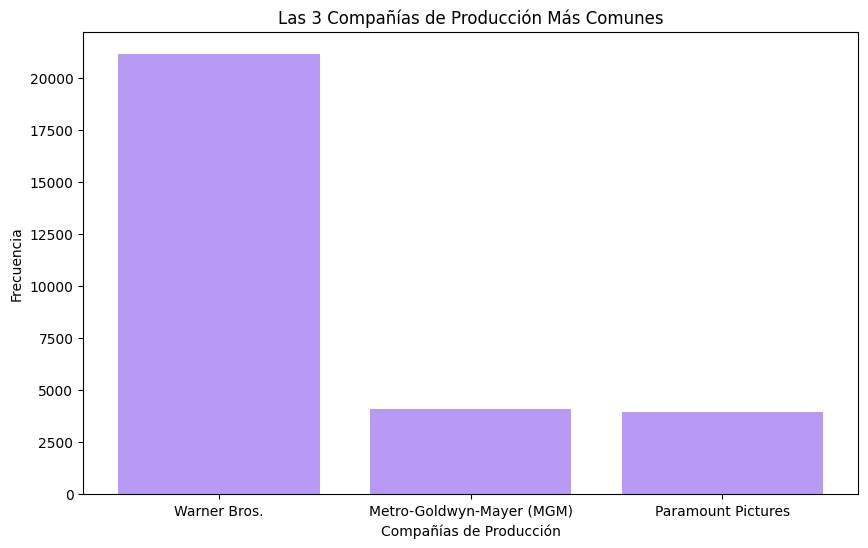

In [66]:
#Graficamos 
plt.figure(figsize=(10, 6))
plt.bar(companies, counts, color='#b89af5')
plt.title('Las 3 Compañías de Producción Más Comunes')
plt.xlabel('Compañías de Producción')
plt.ylabel('Frecuencia')
plt.show()

In [61]:
#Para los 3 países más comunes en production_countries, repetimos lo mismo que en production_companies:
country_counter = Counter()

In [62]:
for countries in movies['production_countries'].dropna():
    countries_list = ast.literal_eval(countries)
    for country in countries_list:
        country_counter[country['name']] += 1

In [63]:
top_3_countries = country_counter.most_common(3)
print("Los 3 países de producción más comunes son:", top_3_countries)

Los 3 países de producción más comunes son: [('United States of America', 21147), ('United Kingdom', 4091), ('France', 3937)]


In [64]:
countries, counts = zip(*top_3_countries)

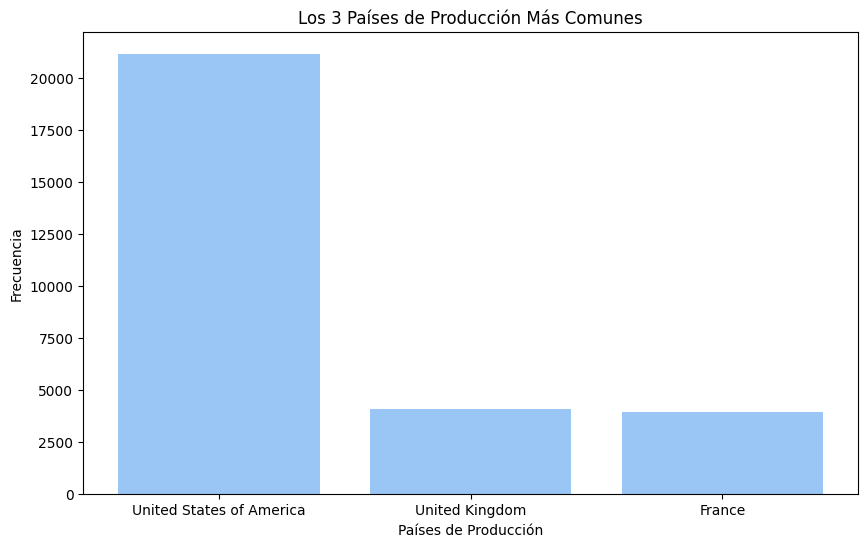

In [65]:
plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color='#9ac6f5')
plt.title('Los 3 Países de Producción Más Comunes')
plt.xlabel('Países de Producción')
plt.ylabel('Frecuencia')
plt.show()

In [72]:
#Año con mayor estrenos en la columna release_year
most_common_year = movies['release_year'].mode()[0]
year_counts = movies['release_year'].value_counts()

In [74]:
print(f'El año con mayor cantidad de estrenos es: {most_common_year}')

El año con mayor cantidad de estrenos es: 2014


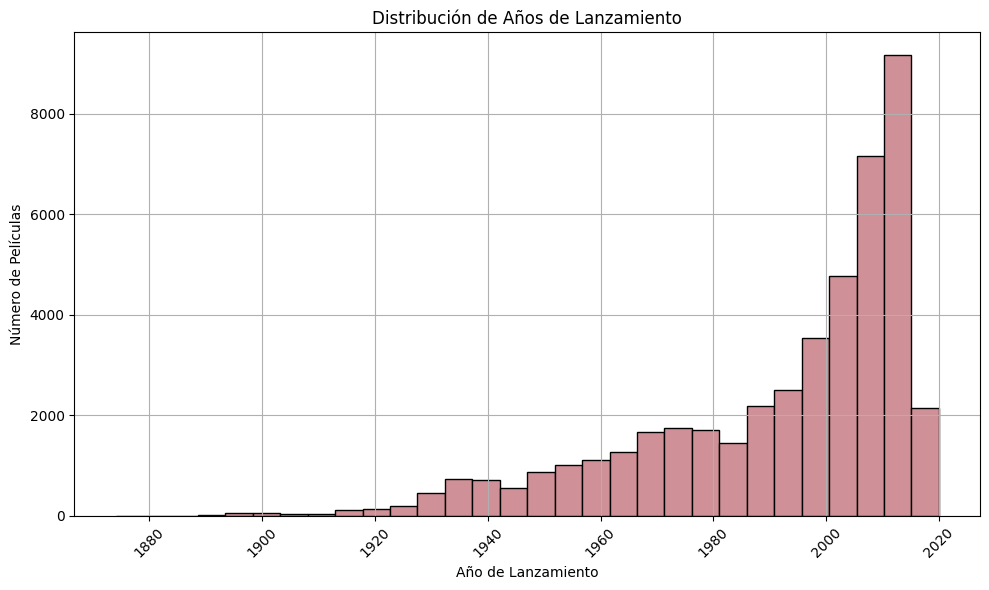

In [76]:
plt.figure(figsize=(10, 6))
plt.hist(movies['release_year'], bins=30, color='#cf9197', edgecolor='black')
plt.title('Distribución de Años de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [83]:
#Pasamos al DF de credits, viendo quienes son los actores con más apariciones:
top_cast = movies_credits['name_cast'].value_counts().head(3)

In [85]:
print(f'Los 3 actores con más apariciones son: {top_cast}')

Los 3 actores con más apariciones son: name_cast
Samuel L. Jackson    26
Steve Buscemi        26
Demi Moore           26
Name: count, dtype: int64


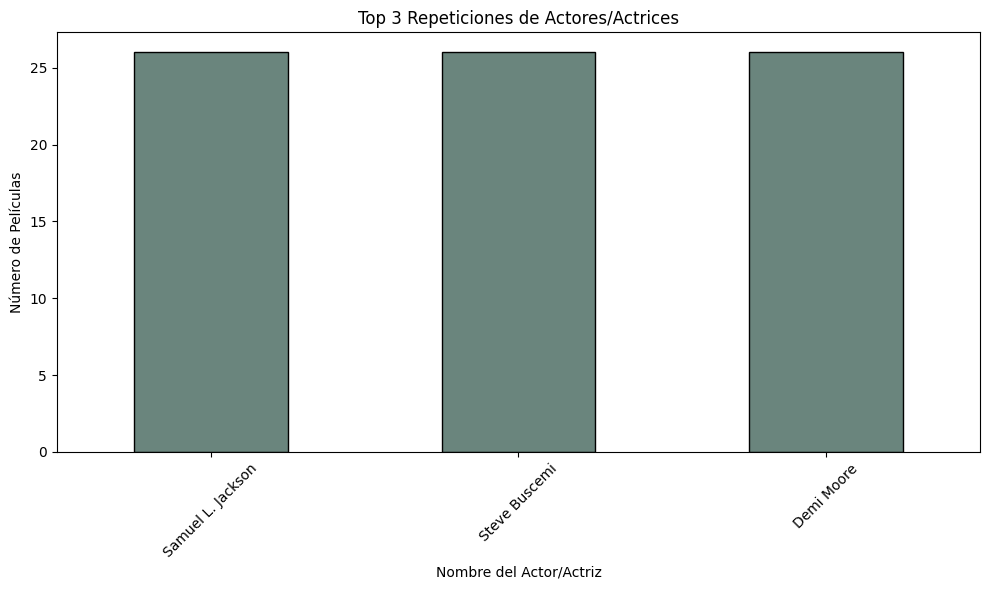

In [84]:
#Graficamos
plt.figure(figsize=(10, 6))
top_cast.plot(kind='bar', color='#6a857d', edgecolor='black')
plt.title('Top 3 Repeticiones de Actores/Actrices')
plt.xlabel('Nombre del Actor/Actriz')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [86]:
#Top 3 directores:
top_directors = movies_credits['name_crew'].value_counts().head(3)

In [88]:
print(f'Los 3 directores con mayor cantidad de películas son: {top_directors}')

Los 3 directores con mayor cantidad de películas son: name_crew
Alfred Hitchcock    83
Jerry Goldsmith     50
Billy Hopkins       43
Name: count, dtype: int64


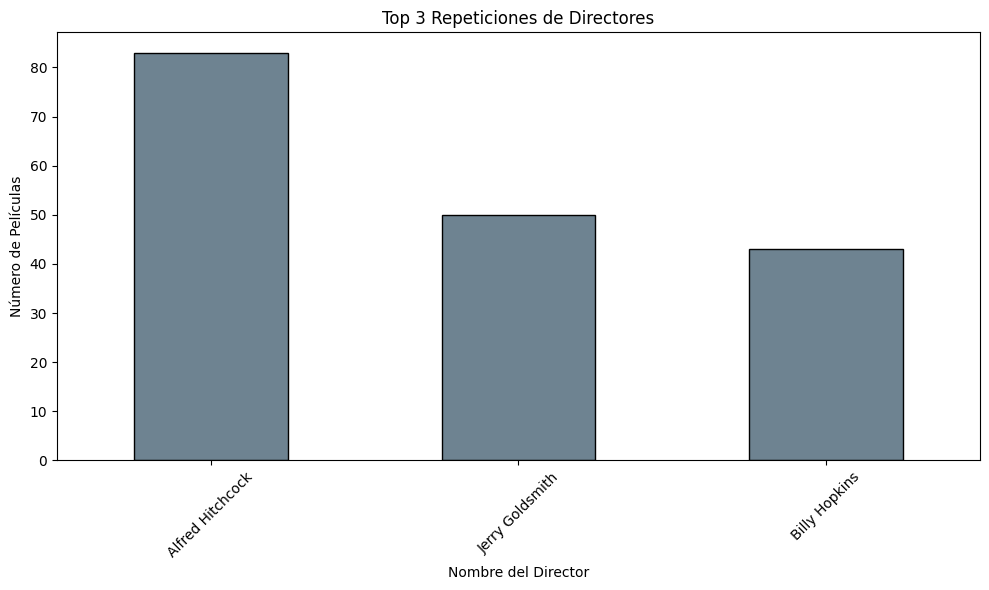

In [89]:
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='#6e8391', edgecolor='black')
plt.title('Top 3 Repeticiones de Directores')
plt.xlabel('Nombre del Director')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [92]:
#Género (1, 2, refiriéndose a femenino - masculino) con mayor cantidad de apariciones: 
gender_counts = movies_credits['gender'].value_counts()

In [93]:
gender_max = gender_counts.idxmax()

In [94]:
print(f'El género con más apariciones en el DF es: {gender_max}')

El género con más apariciones en el DF es: 2.0


Esto indica que el género masculino es más frecuente.

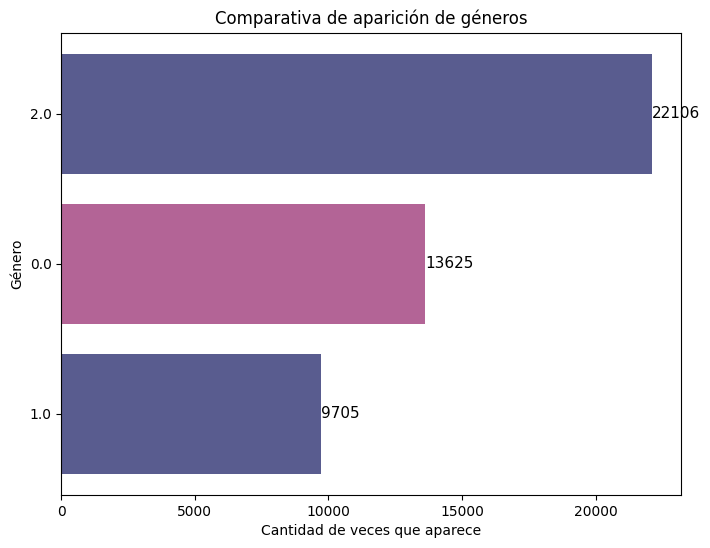

In [102]:
plt.figure(figsize=(8, 6))
bars = plt.barh(gender_counts.index.astype(str), gender_counts.values, color=['#595c8f', '#b36496'])
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=11, color='black')
plt.xlabel('Cantidad de veces que aparece')
plt.ylabel('Género')
plt.title('Comparativa de aparición de géneros')
plt.yticks(gender_counts.index.astype(int))
plt.gca().invert_yaxis()
plt.show()